[2.30000000e+01 3.65757655e+04 5.58933718e+04]


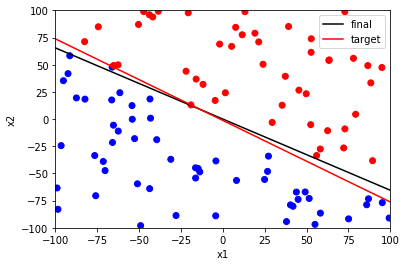

0.0236


In [42]:
#(a)
import matplotlib.pyplot as plt 
import numpy as np
import random

#generate y according to input w and x
def test_h(w, x):
    return np.sign(w @ x)

#training data
def adaline(w_initial, x_training, y_training, x_hypothesis, eta):
    w = w_initial
    updates = 0
    misclassified = True
   
    while (misclassified):
        if (updates >= 1000):
            return w
        y = test_h(w, x_training)
        
        #determining whether there is a misclassified point
        correct = y == y_training3
        
        #if there is no misclassified point, return w
        if np.all(correct):
            misclassified = False
            break;
        #randomly select x(t)
        t = random.randint(0, len(x_training[1])-1)
        
        s = y[t]
        #print("x " + str(x_training[:, t]))
        
        #print("w " + str(w))
        
        #print("s " + str(s))
        
        #print("y " + str(y_training[t]))
        
        if(y_training[t]*s <= 1):
            w = w + eta*((y_training[t]-s)*x_training[:,t])
            updates += 1
    return w

#plot graph by determinining slop and constant term based on input x and w
def plot_h(x, w, *plot_args, **plot_kwargs):
    if (w[2] != 0):
        k = -w[1]/w[2]
        l = -w[0]/w[2]
    else:
        k = 0
        l = 0
    y = k*x + l
    plt.plot(x, y, *plot_args, **plot_kwargs)

    
num_dimensions = 2
num_samples = 10100
num_testing = 10000
num_training = 100
training_range = 100

#create training set x
x_sample = np.zeros((num_dimensions+1,num_samples))
x_sample[0] = np.ones(num_samples)
for i in range(1, num_dimensions + 1):
    l = np.random.uniform(-training_range, training_range, num_samples)
    x_sample[i] = l

x_testing = np.zeros((num_dimensions+1,num_testing))
x_testing[0] = np.ones(num_testing)
x_training = np.zeros((num_dimensions+1,num_training))
x_training[0] = np.ones(num_training)

#create target and initial norm of the decision boundary
w_target = np.array([5, 3, 4])
w_initial = np.array([23, 10, -5])

for i in range(1, num_dimensions+1):
    l = x_sample[i][0:num_testing]
    x_testing[i] = l
    k = x_sample[i][num_testing:num_samples]
    x_training[i] = k
#print(x_testing)
#print(x_training)
#create training set y
y_sample = test_h(w_target, x_sample)
#print(x_training)



#create training set and testing set
y_testing = y_sample[0:num_testing]
y_training = y_sample[num_testing:num_samples]
#plot points on the graph. If y > 0, the point is red. Otherwise, the point is blue
x_coordinates = x_training[1, :]
y_coordinates = x_training[2, :]
colors = ["r" if y > 0 else "b" for y in y_training]


f=plt.figure()
plt.scatter(x_coordinates, y_coordinates, c = colors)

x_hypothesis = np.array([-training_range, training_range])

#the final norm for the decision boundary
eta = 100
w_final = adaline(w_initial, x_training, y_training, x_hypothesis, eta)

print(w_final)

plot_h(x_hypothesis, w_final, 'k', label = 'final')
#plot the target decision boundaries
plot_h(x_hypothesis, w_target, 'r', label = 'target')



plt.legend()
plt.xlim(-training_range, training_range)
plt.ylim(-training_range, training_range)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

f.savefig("5a.pdf", bbox_inches='tight')

def mis(w, x, y):
    missList = []
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            missList.append(i)
    return len(missList)

mis = mis(w_final, x_testing, y_testing)
error = mis/len(y_testing)
print(error)

[ 27.         389.71132276 581.82216649]


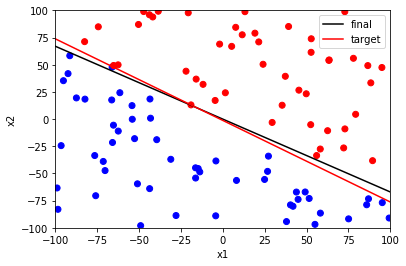

0.0186


In [46]:
f=plt.figure()
plt.scatter(x_coordinates, y_coordinates, c = colors)

x_hypothesis = np.array([-training_range, training_range])
eta = 1
w_final = adaline(w_initial, x_training, y_training, x_hypothesis, eta)

print(w_final)

plot_h(x_hypothesis, w_final, 'k', label = 'final')
#plot the target decision boundaries
plot_h(x_hypothesis, w_target, 'r', label = 'target')



plt.legend()
plt.xlim(-training_range, training_range)
plt.ylim(-training_range, training_range)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

f.savefig("5b.pdf", bbox_inches='tight')

def mis(w, x, y):
    missList = []
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            missList.append(i)
    return len(missList)

mis = mis(w_final, x_testing, y_testing)
error = mis/len(y_testing)
print(error)

[22.76        5.52624695  8.91232959]


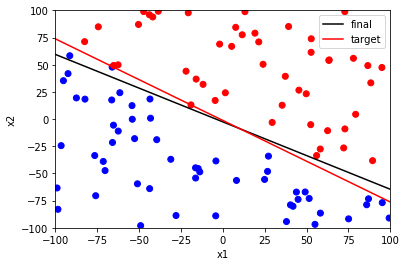

0.0326


In [67]:
f=plt.figure()
plt.scatter(x_coordinates, y_coordinates, c = colors)

x_hypothesis = np.array([-training_range, training_range])
eta = 0.01
w_final = adaline(w_initial, x_training, y_training, x_hypothesis, eta)

print(w_final)

plot_h(x_hypothesis, w_final, 'k', label = 'final')
#plot the target decision boundaries
plot_h(x_hypothesis, w_target, 'r', label = 'target')



plt.legend()
plt.xlim(-training_range, training_range)
plt.ylim(-training_range, training_range)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

f.savefig("5c.pdf", bbox_inches='tight')

def mis(w, x, y):
    missList = []
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            missList.append(i)
    return len(missList)

mis = mis(w_final, x_testing, y_testing)
error = mis/len(y_testing)
print(error)

[22.9848      7.06828768  0.66756958]


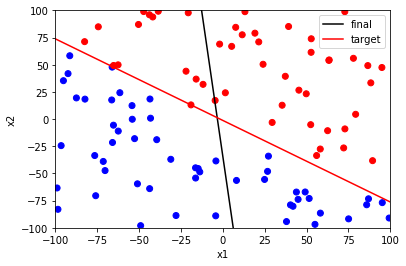

0.2854


In [50]:
f=plt.figure()
plt.scatter(x_coordinates, y_coordinates, c = colors)

x_hypothesis = np.array([-training_range, training_range])
eta = 0.0001
w_final = adaline(w_initial, x_training, y_training, x_hypothesis, eta)

print(w_final)

plot_h(x_hypothesis, w_final, 'k', label = 'final')
#plot the target decision boundaries
plot_h(x_hypothesis, w_target, 'r', label = 'target')



plt.legend()
plt.xlim(-training_range, training_range)
plt.ylim(-training_range, training_range)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

f.savefig("5d.pdf", bbox_inches='tight')

def mis(w, x, y):
    missList = []
    s = np.sign(w@x)
    for i in range(len(y)):
        if (s[i]!=y[i]):
            missList.append(i)
    return len(missList)

mis = mis(w_final, x_testing, y_testing)
error = mis/len(y_testing)
print(error)